In [250]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [251]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [252]:
iris = pd.read_csv('../input/iris-flower-dataset/IRIS.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [253]:
iris.shape

(150, 5)

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [255]:
X = iris.drop('species', axis=1)
y = iris['species']

In [256]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [257]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [258]:
print(X_train.shape)
print(y_train.shape)

(120, 4)
(120,)


In [259]:
print(X_val.shape)
print(y_val.shape)

(30, 4)
(30,)


In [260]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

In [261]:
pd.DataFrame({'Actual':y_val, 'Predicted':y_pred})

,Actual,Predicted
147,Iris-virginica,Iris-virginica
102,Iris-virginica,Iris-virginica
148,Iris-virginica,Iris-virginica
101,Iris-virginica,Iris-virginica
87,Iris-versicolor,Iris-versicolor
38,Iris-setosa,Iris-setosa
97,Iris-versicolor,Iris-versicolor
20,Iris-setosa,Iris-setosa
47,Iris-setosa,Iris-setosa
16,Iris-setosa,Iris-setosa


# Visualization

## 1. Text Representation

In [262]:
from sklearn import tree

In [263]:
text = tree.export_text(model)
print(text)

|--- feature_2 <= 2.60
|   |--- class: Iris-setosa
|--- feature_2 >  2.60
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



## 2. Plot Tree with plot_tree

In [264]:
features = iris.columns.tolist()[:-1]
target = iris.species.unique()

In [265]:
print(features)
print(target)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


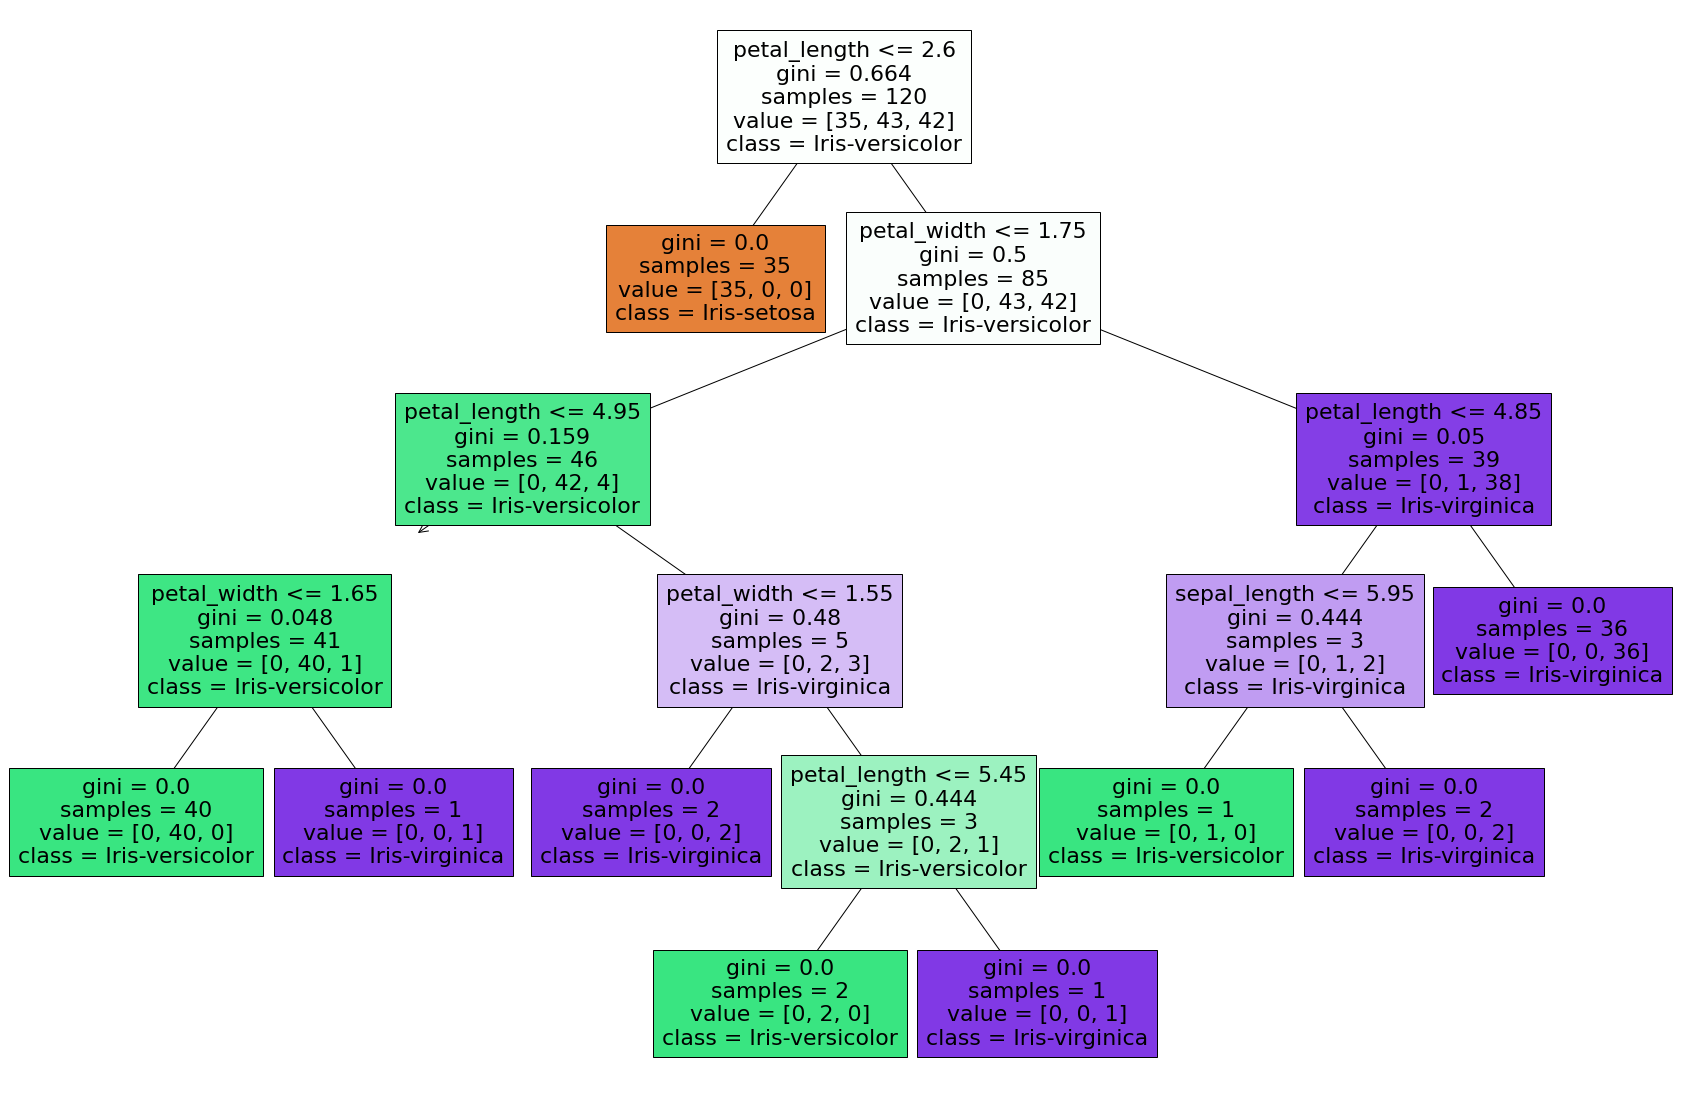

In [269]:
fig = plt.figure(figsize=(30,20))
plot = tree.plot_tree(model, feature_names=features,  
                      class_names=target, filled=True)

In [267]:
plot

[Text(837.0, 747.4499999999999, 'petal_length <= 2.6\ngini = 0.664\nsamples = 120\nvalue = [35, 43, 42]\nclass = Iris-versicolor'),
 Text(708.2307692307693, 611.55, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = Iris-setosa'),
 Text(965.7692307692308, 611.55, 'petal_width <= 1.75\ngini = 0.5\nsamples = 85\nvalue = [0, 43, 42]\nclass = Iris-versicolor'),
 Text(515.0769230769231, 475.65, 'petal_length <= 4.95\ngini = 0.159\nsamples = 46\nvalue = [0, 42, 4]\nclass = Iris-versicolor'),
 Text(257.53846153846155, 339.74999999999994, 'petal_width <= 1.65\ngini = 0.048\nsamples = 41\nvalue = [0, 40, 1]\nclass = Iris-versicolor'),
 Text(128.76923076923077, 203.8499999999999, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]\nclass = Iris-versicolor'),
 Text(386.3076923076923, 203.8499999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(772.6153846153846, 339.74999999999994, 'petal_width <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = Iris-vir

In [268]:
fig.savefig("decistion_tree.png")

## Thank You!